<h1 style="text-align: center;"><span style="color:#4169E1">New York Times Bestseller List: A Visual Exploration</span></h1>
<h3 style="text-align: center;"><span style="color:#191970">Joram Mutenge</span></h3>

### Introduction
<p>In this analysis, I explore the top 20 books that have featured on the NYT Bestseller list. I also review the author who has appeared on this much coveted list the most. Spoiler alert: the book is <b>The Da Vinci Code</b> and the author is James Michener.</p>
<p>Additionally, I review the three authors behind the pseudonyms present in the dataset and the books penned under those pseudonyms.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the dataset.
book = pd.read_csv('nyt-bestsellers.csv', encoding='latin-1')
book.head()

,index,year,month,day,big_endian_date,little_endian_date,us_date,title,authors,first_author,second_author,pseudonym_of
0,1,1931,10,12,1931-10-12,12/10/1931,10/12/1931,The Ten Commandments,Warwick Deeping,Warwick Deeping,NaN,NaN
1,2,1931,10,19,1931-10-19,19/10/1931,10/19/1931,No List Published,NaN,NaN,NaN,NaN
2,3,1931,10,26,1931-10-26,26/10/1931,10/26/1931,No List Published,NaN,NaN,NaN,NaN
3,4,1931,11,2,1931-11-2,2/11/1931,11/2/1931,No List Published,NaN,NaN,NaN,NaN
4,5,1931,11,9,1931-11-9,9/11/1931,11/9/1931,No List Published,NaN,NaN,NaN,NaN


In [3]:
#Choose relevant columns.
book = book[book.columns[6:12]]
book.head()

,us_date,title,authors,first_author,second_author,pseudonym_of
0,10/12/1931,The Ten Commandments,Warwick Deeping,Warwick Deeping,NaN,NaN
1,10/19/1931,No List Published,NaN,NaN,NaN,NaN
2,10/26/1931,No List Published,NaN,NaN,NaN,NaN
3,11/2/1931,No List Published,NaN,NaN,NaN,NaN
4,11/9/1931,No List Published,NaN,NaN,NaN,NaN


In [4]:
#See column names.
book.columns

Index(['us_date', 'title', 'authors', 'first_author', 'second_author',
       'pseudonym_of'],
      dtype='object')

In [5]:
book.shape

(4739, 6)

<p>There are 4739 rows and 6 columns.</p>  
<p>Check datatype for columns.</p>  

In [6]:
book.dtypes

us_date          object
title            object
authors          object
first_author     object
second_author    object
pseudonym_of     object
dtype: object

<p>The date type is character. This isn't what we want. Let's change it to date.</p> 

In [7]:
book['us_date'] = book['us_date'].apply(pd.to_datetime)
book['us_date'].dtypes

dtype('<M8[ns]')

See which year had the most unique books as bestsellers.  
Create a column with date as year only called __year__.

In [8]:
book['year'] = book['us_date'].dt.year
book.head()

,us_date,title,authors,first_author,second_author,pseudonym_of,year
0,1931-10-12,The Ten Commandments,Warwick Deeping,Warwick Deeping,NaN,NaN,1931
1,1931-10-19,No List Published,NaN,NaN,NaN,NaN,1931
2,1931-10-26,No List Published,NaN,NaN,NaN,NaN,1931
3,1931-11-02,No List Published,NaN,NaN,NaN,NaN,1931
4,1931-11-09,No List Published,NaN,NaN,NaN,NaN,1931


Remove rows that contain the phrase 'No List Published' in title column.

In [9]:
book = book[book["title"].str.contains('No List Published')==False]
book.shape

(4734, 7)

<p>See which title appears the most on the bestseller list.</p>

In [10]:
book['times_on_list'] = book.groupby('title')['title'].transform('count')
book_list = book[['title', 'times_on_list']].sort_values(by=['times_on_list'], ascending=0)
book_listed_count = book_list.drop_duplicates(keep='first').head(20)
book_listed_count

,title,times_on_list
3767,The Da Vinci Code,59
1482,Hawaii,49
1082,The Caine Mutiny,48
582,The Robe,46
2031,Love Story,41
1782,The Source,40
3205,The Bridges of Madison County,38
2165,Jonathan Livingston Seagull,38
2369,Trinity,36
4567,Where the Crawdads Sing,34


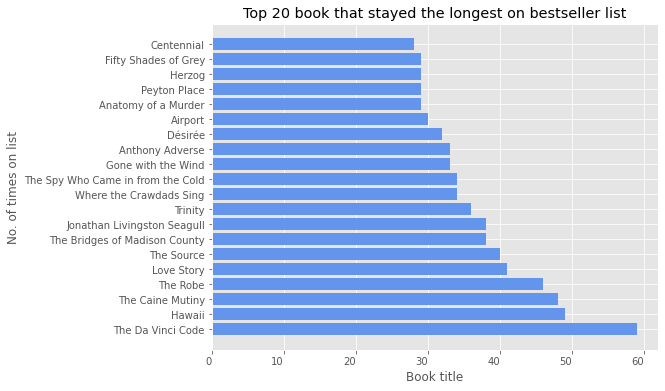

In [11]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
# horizontal barplot with barh()
ax.barh(book_listed_count['title'], book_listed_count['times_on_list'], color='#6495ED')
# get axis tick labels
labels = ax.get_xticklabels()
# rotate the tick labels
plt.setp(labels,
         horizontalalignment='right')
# set axis labels and title
ax.set(xlabel='Book title', ylabel='No. of times on list',
       title='Top 20 book that stayed the longest on bestseller list')
plt.show()

<b>The Da Vinci Code</b> has featured the most on the bestseller list, which isn't surprising considering how much buzz surrounded the book when it was published. I'm also not surprised that <b>Fifty Shades of Grey</b> made this list. I don't recognize the other books.</p>  

<p>Which author has been on the list the most.</p>

In [12]:
book['count_on_list'] = book.groupby('authors')['authors'].transform('count')
popular_author = book[['authors', 'count_on_list']].sort_values(by=['count_on_list'], ascending=0)
popular_author_count = popular_author.drop_duplicates(keep='first').head(20)
popular_author_count

,authors,count_on_list
1508,James Michener,200.0
3729,John Grisham,165.0
2658,Stephen King,136.0
2901,Danielle Steel,101.0
1046,Herman Wouk,91.0
3820,Dan Brown,81.0
2749,Robert Ludlum,81.0
1707,John le Carré,77.0
2865,Tom Clancy,71.0
1459,Leon Uris,66.0


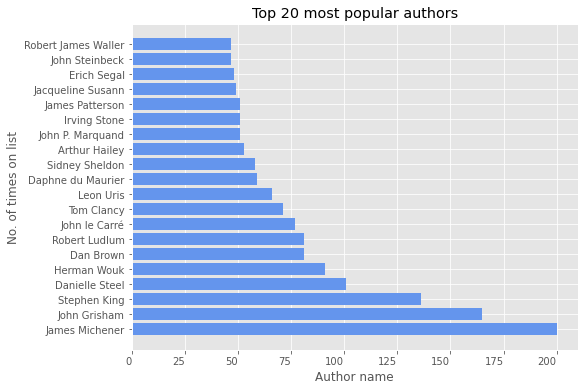

In [13]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
# horizontal barplot with barh()
ax.barh(popular_author_count['authors'], popular_author_count['count_on_list'], color='#6495ED')
# get axis tick labels
labels = ax.get_xticklabels()
# rotate the tick labels
plt.setp(labels,
         horizontalalignment='right')
# set axis labels and authors
ax.set(xlabel='Author name', ylabel='No. of times on list',
       title='Top 20 most popular authors')
plt.show()

<p>The most popular author on this list is James Michener. Surprisingly, the author of <b>The Da Vinci Code</b>, Dan Brown isn't even on the top 5 list. One reason is that most of the top 5 authors on this list have written many books, e.g. James Michener has written over 40 books, and Danielle Steel has written 190 books including 141 novels. By contrast, Dan Brown has only written 8 books.</p>  
<p>Unlike on the list of book titles, this list is familiar to me. I recognize most of the names on it.</p>

<p>Which year had the most bestsellers</p>

In [14]:
book['year_count'] = book.groupby('year')['year'].transform('count')
books_in_year = book[['year', 'year_count']].sort_values(by=['year_count'], ascending=0)
books_in_year_count = books_in_year.drop_duplicates(keep='first').head(30)
books_in_year_count

,year,year_count
503,1941,54
1846,1967,53
3013,1989,53
4241,2012,53
718,1945,53
3605,2000,53
971,1950,53
3927,2006,53
2112,1972,53
1308,1956,53


In [15]:
books_in_year_count['year'].dtype

dtype('int64')

We need to change the data type for year to object so the graph can view the years as distinct rather than continuous.

In [16]:
books_in_year_count['year'] = books_in_year_count['year'].apply(str)

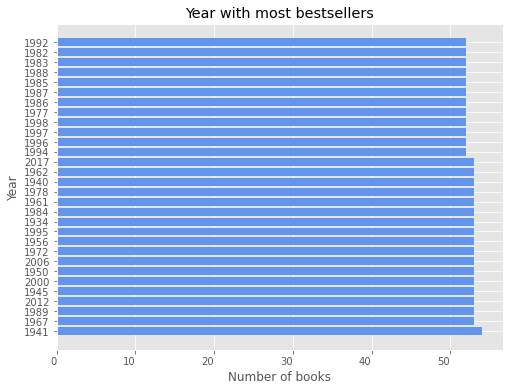

In [17]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
# horizontal barplot with barh()
ax.barh(books_in_year_count['year'], books_in_year_count['year_count'], color='#6495ED')
# get axis tick labels
labels = ax.get_xticklabels()
# rotate the tick labels
plt.setp(labels,
         horizontalalignment='right')
# set axis labels and authors
ax.set(xlabel='Number of books', ylabel='Year',
       title='Year with most bestsellers')
plt.show()

<p>The year that featured the most bestsellers is 1941. This was strange to me given how easy publishing has become today. You'd expect more books to feature on the bestseller list as more and more authors publish their work. Until I discovered that self-published books like kindle books cannot be on the NYT bestseller list. To be on the list, the author must be publish through a traditional publisher.</p>
<p>We can see that the only 21st century years that made the list are 2017, 2012, 2006, and 2000. The rest are 20th years with the forties and thirties dominating.</p>

<p>Let's see how many pseudonyms are in the dataset.</p>

In [18]:
book['pseudonym_of'].nunique()

3

<p>There are 3 pseudonyms. Let's see what they are.</p>

In [19]:
pseudonyms = book['pseudonym_of'].dropna().unique()
for x in pseudonyms:
    print(x)

Stephen King
Joe Klein
J.K. Rowling


<p>Now let's reveal the real authors behind those pseudonyms.</p>

In [20]:
real_authors = book.query('pseudonym_of==["Joe Klein", "J.K. Rowling", "Stephen King"]')[['pseudonym_of', 'authors', 'title']]
real_authors.drop_duplicates(subset=['pseudonym_of', 'authors', 'title'], keep='last')

,pseudonym_of,authors,title
2800,Stephen King,Richard Bachman,Thinner
3369,Joe Klein,Anonymous,Primary Colors
4272,J.K. Rowling,Robert Galbraith,The Cuckoo's Calling


<p>We now know the real authors behind the pseudonyms and the book they published under those pseudonyms.</p>
<p>It's time to see which author was the most successful under a pseudonym by looking at how many times they featured on the bestseller list</p>

In [21]:
real_authors['appearance_count'] = real_authors.groupby('pseudonym_of')['pseudonym_of'].transform('count')
successful_pseudonym = real_authors[['pseudonym_of', 'appearance_count']].sort_values(by=['appearance_count'], ascending=0)
successful_pseudonym.drop_duplicates(subset=['pseudonym_of', 'appearance_count'], keep='last')

,pseudonym_of,appearance_count
3369,Joe Klein,9
2800,Stephen King,4
4272,J.K. Rowling,1


<p>The crown goes to Joe Klein. He has been on the bestseller list under a pseudonym more times followed by Stephen King. J.K. Rowling wasn't as successful as she only appeared once on the list under a pseudonym.</p>